In [ ]:
%tensorflow_version 2.x

In [ ]:
!pip install tensorflow

In [ ]:
!pip install transformers==3.0.2

     |████████████████████████████████| 778kB 6.5MB/s 
     |████████████████████████████████| 3.0MB 11.0MB/s 
     |████████████████████████████████| 901kB 47.9MB/s 
     |████████████████████████████████| 1.2MB 49.0MB/s 


In [ ]:
import logging
logging.getLogger("pytorch_pretrained_bert.tokenization").setLevel(logging.ERROR)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/sentiment data/tr_sen_fin.csv')

In [ ]:
ls = [len(i.split()) for i in list(df.text.values)]

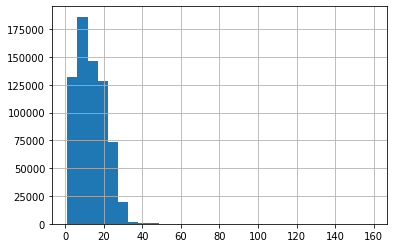

In [ ]:
pd.Series(ls).hist(bins=30)

In [ ]:
max_seq_len = 35

In [ ]:
from transformers import BertTokenizer
bert_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(bert_name,add_special_tokens = True,max_length = max_seq_len,pad_to_max_length=True)

In [ ]:
def bert_encoder(x):
  encoded = tokenizer.encode_plus(x,add_special_tokens=True,max_length=max_seq_len,pad_to_max_length=True,truncation=True,return_attention_mask=True,return_tensors='np')
  return encoded['input_ids'],encoded['attention_mask']

In [ ]:
y = bert_encoder(df['text'][0])

In [ ]:
df['encoded'] = df['text'].apply(bert_encoder)

In [ ]:
dfs_tr = [df[df['kfold']!=f].reset_index(drop=True) for f in range(0,5)]
dfs_ts = [df[df['kfold']==f].reset_index(drop=True) for f in range(0,5)]

In [ ]:
z = dfs_tr[0]['encoded']

In [ ]:
k = list(z)

In [ ]:
x_tr = np.array(k)

In [ ]:
x_tr_inp_ids,x_tr_att_mks = np.split(x_tr,2,axis = 1)

In [ ]:
print(x_tr_inp_ids.shape,x_tr_att_mks.shape)

(552000, 1, 1, 35) (552000, 1, 1, 35)


In [ ]:
import tensorflow as tf
bert_tr =[bert_encoder(x) for x in list(df_tr.text.values)]
bert_ts =[bert_encoder(x) for x in list(dfs_ts[0].text.values)]

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
import tensorflow as tf
tr_fold_set = []
ts_fold_set = []
for i in range(len(dfs_tr)):
  encoder = LabelEncoder()
  bert_tr_lb = np_utils.to_categorical(encoder.fit_transform(dfs_tr[i].label.values))
  bert_ts_lb = np_utils.to_categorical(encoder.fit_transform(dfs_ts[i].label.values))
  tr = list(dfs_tr[i]['encoded'])
  ts = list(dfs_ts[i]['encoded'])
  x_tr = np.array(tr)
  x_ts = np.array(ts)
  x_tr_inp_ids,x_tr_att_mks = np.split(x_tr,2,axis = 1)
  x_ts_inp_ids,x_ts_att_mks = np.split(x_ts,2,axis = 1)
  x_tr_inp_ids = x_tr_inp_ids.squeeze()
  x_tr_att_mks = x_tr_att_mks.squeeze()
  x_ts_inp_ids = x_ts_inp_ids.squeeze()
  x_ts_att_mks = x_ts_att_mks.squeeze()
  print(x_tr_inp_ids.shape,x_tr_att_mks.shape)
  print(x_ts_inp_ids.shape,x_ts_att_mks.shape)
  # x_tr_fin=[tf.convert_to_tensor(x_tr_inp_ids,dtype=tf.int64),tf.convert_to_tensor(x_tr_att_mks,dtype=tf.int64)]
  # y_tr_fin=tf.convert_to_tensor(bert_tr_lb,np.float32)
  # x_ts_fin =[tf.convert_to_tensor(x_ts_inp_ids,dtype=tf.int64),tf.convert_to_tensor(x_ts_att_mks,dtype=tf.int64)]
  # y_ts_fin = tf.convert_to_tensor(bert_ts_lb,np.float32)
  # tr_fold_set.append((x_tr_fin,y_tr_fin))
  # ts_fold_set.append((x_ts_fin,y_ts_fin))


(552000, 35) (552000, 35)
(138000, 35) (138000, 35)
(552000, 35) (552000, 35)
(138000, 35) (138000, 35)
(552000, 35) (552000, 35)
(138000, 35) (138000, 35)
(552000, 35) (552000, 35)
(138000, 35) (138000, 35)
(552000, 35) (552000, 35)
(138000, 35) (138000, 35)


In [ ]:
tr_fold_set[0]

([<tf.Tensor: shape=(552000, 1, 1, 35), dtype=int64, numpy=
  array([[[[  101, 22091,  2053, ...,     0,     0,     0]]],
  
  
         [[[  101,  2044,  2048, ...,     0,     0,     0]]],
  
  
         [[[  101,  1045,  5223, ...,     0,     0,     0]]],
  
  
         ...,
  
  
         [[[  101,  1030,  8226, ...,     0,     0,     0]]],
  
  
         [[[  101,  9724,  3871, ...,     0,     0,     0]]],
  
  
         [[[  101,  2821,  1037, ...,     0,     0,     0]]]])>,
  <tf.Tensor: shape=(552000, 1, 1, 35), dtype=int64, numpy=
  array([[[[1, 1, 1, ..., 0, 0, 0]]],
  
  
         [[[1, 1, 1, ..., 0, 0, 0]]],
  
  
         [[[1, 1, 1, ..., 0, 0, 0]]],
  
  
         ...,
  
  
         [[[1, 1, 1, ..., 0, 0, 0]]],
  
  
         [[[1, 1, 1, ..., 0, 0, 0]]],
  
  
         [[[1, 1, 1, ..., 0, 0, 0]]]])>],
 <tf.Tensor: shape=(552000, 5), dtype=float32, numpy=
 array([[0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        [0., 0., 0., 1., 0.],
        ...,
        [0., 0.,

In [ ]:
x_tr = np.array(k)
# x_ts = np.array(bert_ts)

In [ ]:
x_tr_inp_ids,x_tr_att_mks = np.split(x_tr,2,axis = 1)
# x_ts_inp_ids,x_ts_att_mks = np.split(x_ts,2,axis = 1)

In [ ]:
x_tr_inp_ids = x_tr_inp_ids.squeeze()
x_tr_att_mks = x_tr_att_mks.squeeze()
# x_tr_tk_ids = x_tr_tk_ids.squeeze()
# x_ts_tk_ids = x_ts_tk_ids.squeeze()
# x_ts_inp_ids = x_ts_inp_ids.squeeze()
# x_ts_att_mks = x_ts_att_mks.squeeze()

In [ ]:
x_tr_att_mks.shape

(552000, 35)

In [ ]:
x_tr_fin=[tf.convert_to_tensor(x_tr_inp_ids,dtype=tf.int64),tf.convert_to_tensor(x_tr_att_mks,dtype=tf.int64)]
y_tr_fin=tf.convert_to_tensor(bert_tr_lb,np.float32)
x_ts_fin =[tf.convert_to_tensor(x_ts_inp_ids,dtype=tf.int64),tf.convert_to_tensor(x_ts_att_mks,dtype=tf.int64)]
y_ts_fin = tf.convert_to_tensor(bert_ts_lb,np.float32)

In [ ]:
def examples_to_features(inp_ids,att_mks,y):
  return {"input_ids":inp_ids,
          "attention_mask":att_mks
          # "token_type_ids":tk_ids
          },y

In [ ]:
train_ds = tf.data.Dataset.from_tensor_slices((x_tr_inp_ids,x_tr_att_mks,bert_tr_lb)).map(examples_to_features)
test_ds = tf.data.Dataset.from_tensor_slices((x_ts_inp_ids,x_ts_att_mks,bert_ts_lb)).map(examples_to_features)

In [ ]:
test_ds.element_spec

({'attention_mask': TensorSpec(shape=(35,), dtype=tf.int64, name=None),
  'input_ids': TensorSpec(shape=(35,), dtype=tf.int64, name=None)},
 TensorSpec(shape=(5,), dtype=tf.float32, name=None))

In [ ]:
from transformers import TFBertModel
# bert = TFBertModel.from_pretrained(bert_name)
bert = TFBertModel.from_pretrained(bert_name)

- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
# 0: (None,35,768)
# 1: (None,768)


def create_model():
    # bert = TFBertForSequenceClassification.from_pretrained(bert_name)
    # bert.trainable = False
    inputs = tf.keras.layers.Input((max_seq_len,), dtype=tf.int64,name="input_ids")
    mask = tf.keras.layers.Input((max_seq_len,), dtype=tf.int64,name="attention_mask")
    # tok = tf.keras.layers.Input((max_seq_len,), dtype=tf.int64,name="token_type_ids")
    preds = bert(
        inputs=inputs,
        attention_mask=mask
        # token_type_ids=tok
        # training = False
    )[0]
    # 
    # preds = tf.keras.layers.Reshape((768,1))(preds)
    # x = tf.keras.layers.Dropout(0.2)(preds)
    conv = tf.keras.layers.Conv1D(32,3,activation='relu',padding='same')
    max_pool = tf.keras.layers.AveragePooling1D(padding='same')
    conv1 = tf.keras.layers.Conv1D(32,3,activation='relu')
    # max_pool1 = tf.keras.layers.MaxPool1D()
    # # conv1 = tf.keras.layers.Conv1D(32,3,activation='relu')
    # # max_pool1 = tf.keras.layers.MaxPool1D()
    # flat = tf.keras.layers.Flatten()
    # gru = tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16,return_sequences=True,dropout=0.2, recurrent_dropout=0.3))
    x = conv(preds)
    x = max_pool(x)
    
    x = conv1(x)
    # x = max_pool1(x)
    # x = gru(x)
    x = tf.keras.layers.GlobalAveragePooling1D()(x)
    # # x = conv(x)
    # # x = max_pool(x)
    # # x = conv(x)
    # x = max_pool1(x)
    # x = flat(x)
    # # # tf.keras.layers.Conv1D(32,3,activation='relu'),
    # # # tf.keras.layers.MaxPool1D(),
    # # # tf.keras.layers.Conv1D(32,3,activation='relu'),
    # # # tf.keras.layers.MaxPool1D(),
    # # tf.keras.layers.Dropout(0.5),
    x = tf.keras.layers.Dropout(0.2)(x)
    # x = tf.keras.layers.Dense(512,activation='relu')(x)
    # x = tf.keras.layers.Dense(128,activation='relu')(x)
    
    x = tf.keras.layers.Dense(20,activation='relu')(x)
    x = tf.keras.layers.Dense(5,activation='softmax')(x)
    return tf.keras.Model([inputs, mask], x)

In [ ]:
import os
import pprint # for pretty printing our device stats

if 'COLAB_TPU_ADDR' not in os.environ:
    print('ERROR: Not connected to a TPU runtime; please see the first cell in this notebook for instructions!')
else:
    tpu_address = 'grpc://' + os.environ['COLAB_TPU_ADDR']
    print ('TPU address is', tpu_address)

    with tf.compat.v1.Session(tpu_address) as session:
      devices = session.list_devices()

    print('TPU devices:')
    pprint.pprint(devices)

TPU address is grpc://10.11.10.130:8470
TPU devices:
[_DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:CPU:0, CPU, -1, -5409116454430183232),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 8589934592, -2557692911495921646),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 17179869184, 2267392562094382272),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:0, TPU, 17179869184, 6907375839584699302),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:1, TPU, 17179869184, 1873322624396006933),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:2, TPU, 17179869184, 1138052983315972361),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:3, TPU, 17179869184, 6314240442552438168),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:4, TPU, 17179869184, 6384594806148501214),
 _DeviceAttributes(/job:tpu_worker/replica:0/task:0/device:TPU:5, TPU, 17179869184, -

In [ ]:
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))
strategy = tf.distribute.TPUStrategy(resolver)

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Initializing the TPU system: grpc://10.11.10.130:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.11.10.130:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU')]
INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


In [ ]:
with strategy.scope():
  bert = TFBertModel.from_pretrained(bert_name)
  bert.trainable = False
  

- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPretraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
If your task is similar to the task the model of the ckeckpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
with strategy.scope():
  model = create_model()
  model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [ ]:
model.summary()

Model: "model_6"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_ids (InputLayer)          [(None, 35)]         0                                            
__________________________________________________________________________________________________
attention_mask (InputLayer)     [(None, 35)]         0                                            
__________________________________________________________________________________________________
tf_bert_model_10 (TFBertModel)  ((None, 35, 768), (N 109482240   input_ids[0][0]                  
                                                                 attention_mask[0][0]             
__________________________________________________________________________________________________
conv1d_6 (Conv1D)               (None, 35, 32)       73760       tf_bert_model_10[1][0]     

In [ ]:
from keras.callbacks import EarlyStopping
# bert.trainable= False
# tf.config.run_functions_eagerly(False)
his = model.fit(x=x_tr_fin,y=y_tr_fin,validation_data=(x_ts_fin,y_ts_fin),epochs=100,callbacks=[EarlyStopping()])

Epoch 1/100
17250/17250 [==============================] - 380s 21ms/step - loss: 0.9429 - accuracy: 0.6240 - val_loss: 0.7074 - val_accuracy: 0.7345
Epoch 2/100
17250/17250 [==============================] - 360s 21ms/step - loss: 0.7303 - accuracy: 0.7234 - val_loss: 0.6898 - val_accuracy: 0.7397
Epoch 3/100
17250/17250 [==============================] - 363s 21ms/step - loss: 0.6920 - accuracy: 0.7397 - val_loss: 0.6599 - val_accuracy: 0.7518
Epoch 4/100
17250/17250 [==============================] - 362s 21ms/step - loss: 0.6732 - accuracy: 0.7475 - val_loss: 0.6418 - val_accuracy: 0.7621
Epoch 5/100
17250/17250 [==============================] - 362s 21ms/step - loss: 0.6563 - accuracy: 0.7545 - val_loss: 0.6356 - val_accuracy: 0.7605
Epoch 6/100
17250/17250 [==============================] - 360s 21ms/step - loss: 0.6488 - accuracy: 0.7569 - val_loss: 0.6204 - val_accuracy: 0.7701
Epoch 7/100
17250/17250 [==============================] - 358s 21ms/step - loss: 0.6415 - accuracy:

In [ ]:
his.history

{'accuracy': [0.670893132686615,
  0.7272680997848511,
  0.7422155737876892,
  0.7492771744728088,
  0.7540488839149475,
  0.7575742602348328,
  0.7604873180389404],
 'loss': [0.8442266583442688,
  0.7212066650390625,
  0.6872373819351196,
  0.6696718335151672,
  0.6572243571281433,
  0.6481632590293884,
  0.6409372687339783],
 'val_accuracy': [0.7344637513160706,
  0.739673912525177,
  0.7517753839492798,
  0.762123167514801,
  0.7604782581329346,
  0.7700724601745605,
  0.7687174081802368],
 'val_loss': [0.7073525190353394,
  0.689842939376831,
  0.6598831415176392,
  0.6417540311813354,
  0.6355701088905334,
  0.620424747467041,
  0.6219537258148193]}

In [ ]:
# !pip install cloud-tpu-client

# import tensorflow as tf
# from cloud_tpu_client import Client
# print(tf.__version__)

# Client().configure_tpu_version(tf.__version__, restart_type='ifNeeded')

 